# Q1. Load and Describe the Dataset
About Dataset
This dataset contains 1,000 simulated observations of urban wildlife behavior across different  environments and times of day. 
It’s designed to help researchers and data scientists classify the adaptation strategy each animal exhibits when navigating human-dominated landscapes. 
The target variable is Adaptation_Signal with four possible classes: Exploitation, Avoidance, Habituation, and Innovation.

Column Descriptions:
Animal_ID: Unique identifier for each individual animal.
Species: Species of the animal (Raccoon, Pigeon, Fox, Squirrel).
Observation_Time: Time of the day when the observation was made (Morning, Afternoon, Evening, Night).
Location_Type: Type of urban area where the animal was observed (Park, Residential, Commercial, Industrial).
Noise_Level_dB: Ambient noise level at the observation site in decibels (dB).
Human_Density: Estimated human presence per 100 square meters.
Food_Source_Score: Score (1–10) indicating ease of access to food.
Shelter_Quality_Score: Score (1–10) indicating the quality of nearby shelter.
Behavior_Anomaly_Score: Score from 0 to 1 showing how unusual the observed behavior was.
Estimated_Daily_Distance_km: Estimated kilometers the animal travels daily.
Adaptation_Signal: Target variable – observed behavioral strategy (Exploitation, Avoidance, Habituation, Innovation).

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\user\Downloads\archive (1)\urban_wildlife_adaptation_english.csv")
df

,Animal_ID,Species,Observation_Time,Location_Type,Noise_Level_dB,Human_Density,Food_Source_Score,Shelter_Quality_Score,Behavior_Anomaly_Score,Estimated_Daily_Distance_km,Adaptation_Signal
0,HAYVAN_0001,Tilki,Gece,Ticari,46.3,51.6,9,4,0.36,0.42,Yenilikçilik
1,HAYVAN_0002,Güvercin,Gece,Konut,51.5,59.0,6,8,0.16,0.27,Sömürü
2,HAYVAN_0003,Rakun,Öğleden Sonra,Ticari,75.9,59.1,7,1,0.10,0.66,Kaçınma
3,HAYVAN_0004,Güvercin,Öğleden Sonra,Konut,71.9,30.8,7,8,0.05,0.99,Alışkanlık
4,HAYVAN_0005,Tilki,Gece,Park,52.8,27.9,4,7,0.25,0.64,Sömürü
...,...,...,...,...,...,...,...,...,...,...,...
995,HAYVAN_0996,Güvercin,Gece,Endüstriyel,42.3,55.4,6,10,0.63,0.95,Alışkanlık
996,HAYVAN_0997,Tilki,Akşam,Park,73.3,32.9,6,10,0.43,0.07,Yenilikçilik
997,HAYVAN_0998,Güvercin,Öğleden Sonra,Konut,73.0,53.0,8,4,0.23,2.74,Kaçınma
998,HAYVAN_0999,Rakun,Akşam,Konut,64.0,35.8,4,3,0.18,3.52,Alışkanlık


In [6]:
df.dropna(inplace=True)


In [ ]:
# Description (as comments):
# This dataset contains observations of animal behavior in urban environments.
# Target Variable: Adaptation_Signal (Exploitation, Avoidance, Habituation, Innovation)
# Features include: Species, Noise_Level_dB, Human_Density, Observation_Time, etc.

In [9]:
# Encode categorical columns
le = LabelEncoder()
le

LabelEncoder()

In [16]:
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Animal_ID,Species,Observation_Time,Location_Type,Noise_Level_dB,Human_Density,Food_Source_Score,Shelter_Quality_Score,Behavior_Anomaly_Score,Estimated_Daily_Distance_km,Adaptation_Signal
0,0,3,1,3,46.3,51.6,9,4,0.36,0.42,3
1,1,0,1,1,51.5,59.0,6,8,0.16,0.27,2
2,2,1,3,3,75.9,59.1,7,1,0.10,0.66,1
3,3,0,3,1,71.9,30.8,7,8,0.05,0.99,0
4,4,3,1,2,52.8,27.9,4,7,0.25,0.64,2


In [18]:
#features and target
X = df.drop("Adaptation_Signal", axis=1)
y = df["Adaptation_Signal"]
X
y

0      3
1      2
2      1
3      0
4      2
      ..
995    0
996    3
997    1
998    0
999    1
Name: Adaptation_Signal, Length: 1000, dtype: int64

In [19]:
#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73031962,  1.57727161, -0.40400647, ..., -0.50779106,
         0.43638517, -0.76770016],
       [-1.72685552, -1.06915727, -0.40400647, ...,  0.87207594,
        -0.78341964, -0.87612422],
       [-1.72339142, -0.18701431,  1.3525434 , ..., -1.5426913 ,
        -1.14936108, -0.59422167],
       ...,
       [ 1.72339142, -1.06915727,  1.3525434 , ..., -0.50779106,
        -0.35648796,  0.90925862],
       [ 1.72685552, -0.18701431, -1.28228141, ..., -0.8527578 ,
        -0.66143916,  1.47306372],
       [ 1.73031962, -1.06915727,  1.3525434 , ...,  1.21704269,
        -0.17351723,  0.93094343]], shape=(1000, 10))

#Q2. Select Three Classification Algorithms
#We'll use Decision Tree, SVM, and Naive Bayes
#Split into train, validation, and test sets
x_temp, x_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val

In [22]:
#Q3. Train Models and Evaluate on Validation Data
#Decision Tree
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(x_train, y_train)
y_pred_val_dt = d_tree.predict(x_val)
print("Decision Tree Validation Accuracy:", accuracy_score(y_val, y_pred_val_dt))

Decision Tree Validation Accuracy: 0.255


In [23]:
#SVM
svm = SVC(kernel='linear', C=1.0, gamma='scale')
svm.fit(x_train, y_train)
y_pred_val_svm = svm.predict(x_val)
print("SVM Validation Accuracy:", accuracy_score(y_val, y_pred_val_svm))

SVM Validation Accuracy: 0.285


In [24]:
#Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_val_nb = nb.predict(x_val)
print("Naive Bayes Validation Accuracy:", accuracy_score(y_val, y_pred_val_nb))

Naive Bayes Validation Accuracy: 0.275


In [26]:
# Q4. Evaluate All Models on Test Data
print("Test Accuracy")

Test Accuracy


In [27]:
y_pred_test_dt = d_tree.predict(x_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_test_dt))

Decision Tree Test Accuracy: 0.25


In [28]:
y_pred_test_svm = svm.predict(x_test)
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_test_svm))

SVM Test Accuracy: 0.345


In [29]:
y_pred_test_nb = nb.predict(x_test)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_test_nb))

Naive Bayes Test Accuracy: 0.34



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.23      0.26        69
           1       0.21      0.27      0.24        48
           2       0.24      0.24      0.24        49
           3       0.28      0.26      0.27        34

    accuracy                           0.25       200
   macro avg       0.25      0.25      0.25       200
weighted avg       0.26      0.25      0.25       200



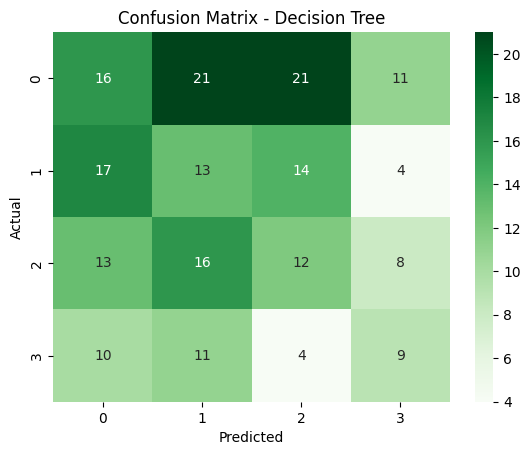

In [30]:
# Confusion Matrix and Classification Report for Decision Tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_test_dt))

cm_dt = confusion_matrix(y_test, y_pred_test_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Classification Report:


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.34      1.00      0.51        69
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        49
           3       0.00      0.00      0.00        34

    accuracy                           0.34       200
   macro avg       0.09      0.25      0.13       200
weighted avg       0.12      0.34      0.18       200



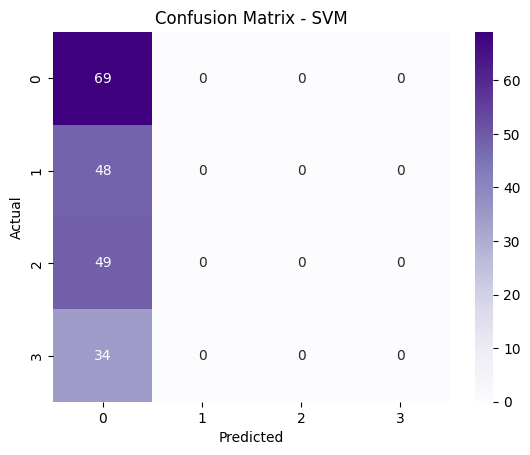

In [31]:
# Confusion Matrix and Classification Report for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_test_svm))

cm_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.57      0.45        69
           1       0.39      0.29      0.33        48
           2       0.25      0.24      0.25        49
           3       0.27      0.09      0.13        34

    accuracy                           0.34       200
   macro avg       0.32      0.30      0.29       200
weighted avg       0.33      0.34      0.32       200



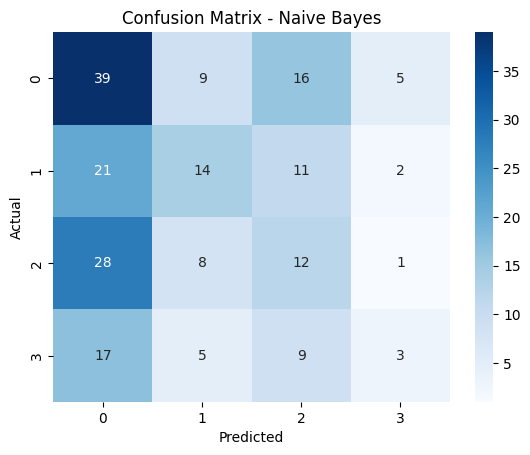

In [32]:
# Confusion Matrix and Classification Report for Naive Bayes
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_test_nb))

cm_nb = confusion_matrix(y_test, y_pred_test_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Q5. Ensemble Classification (Voting)
ensemble = VotingClassifier(estimators=[
    ('dt', d_tree),
    ('svm', svm),
    ('nb', nb)
], voting='hard')

ensemble.fit(x_train, y_train)
y_pred_ensemble = ensemble.predict(x_test)
print("\nVoting Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))



Voting Ensemble Accuracy: 0.375
